#**EDA and Cleaning for the 38K picture**

##load the utility_38k

In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.9 MB/s eta 0:00:00


In [ ]:
# you can adjust the way you import utility_38k as you like
# im using colab and mounting to my google drive
import sys
from google.colab import drive
drive.mount('/content/drive')

sys.path.append('/content/drive/MyDrive/attendance_system')
import utility_38k


In [ ]:
from utility_38k import dataCleaner_38K

##load the dataframe and understand the schema

In [ ]:
df = dataCleaner_38K.loadDF()
print(df.info())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image1  38000 non-null  object
 1   image2  38000 non-null  object
 2   target  38000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 890.8+ KB
None


38k instance with 3 col [image1, image2, target(0 or 1)]

## Explore the data

###Remove corrupted or invalid images from a dataset where images are in bytes format.

In [ ]:
df = dataCleaner_38K.remove_corrupted_images_bytes(df)

Removed 0 corrupted rows.


No corrupted images.

###visualize a sample from our data

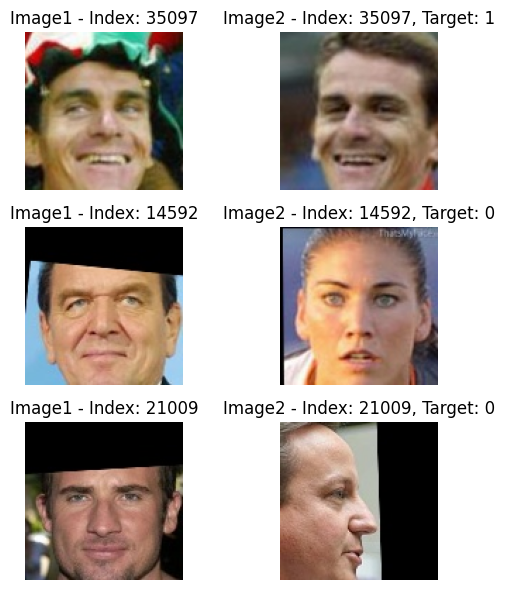

In [ ]:
dataCleaner_38K.visualize_sample(df)

###check for grayscale images and if there convert them to rgb

In [ ]:
df = dataCleaner_38K.process_gray_rgb(df)

0 img out of 76000 were gray scale.


### plot outliers in terms of brightness, contrast, sharpness, and low resolution

#### brightness

Found 1947 brightness outliers.


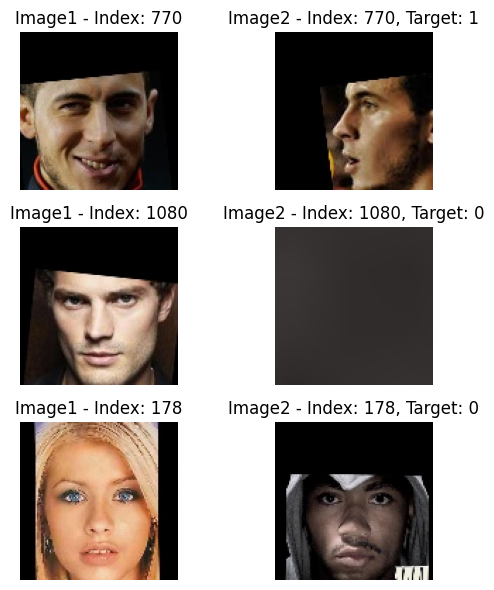

In [ ]:
dataCleaner_38K.plot_brightness_outliers(df)

1947 brightness outliers.
what i guess is the black borders puts much effect on the pic brightness value.

brightness distribution

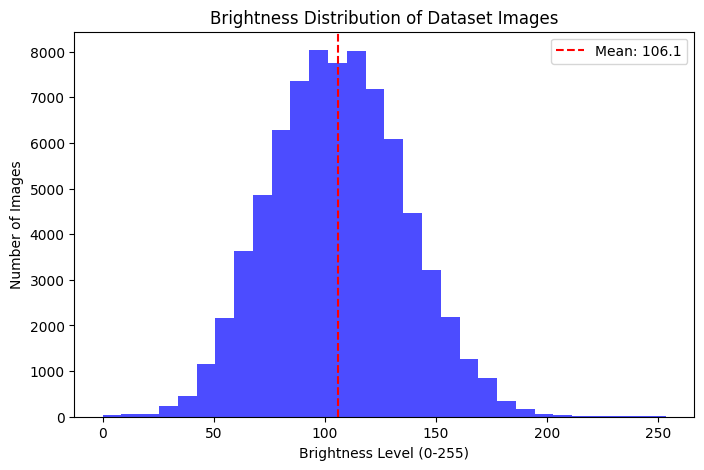

In [ ]:
brightness_dist = dataCleaner_38K.analyze_brightness_distribution(df)

#### contrast

Found 436 contrast outliers.


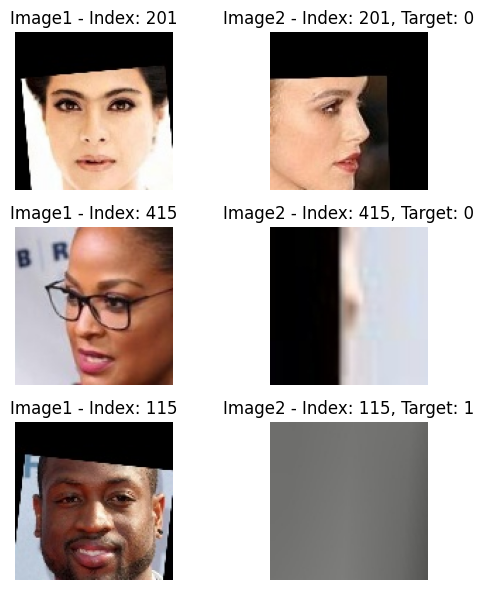

In [ ]:
dataCleaner_38K.plot_contrast_outliers(df)

436 contrast outliers, i hardly believe the borders affect it.

contrast distribution

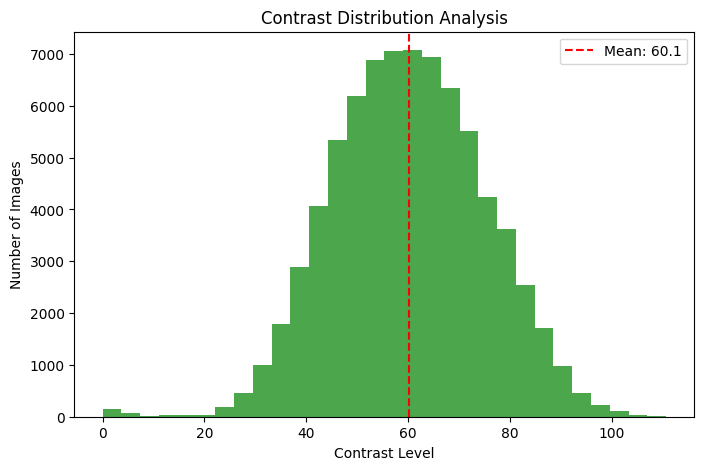

In [ ]:
contrast_dist = dataCleaner_38K.analyze_contrast_distribution(df)

#### sharpness

Found 2030 sharpness outliers.


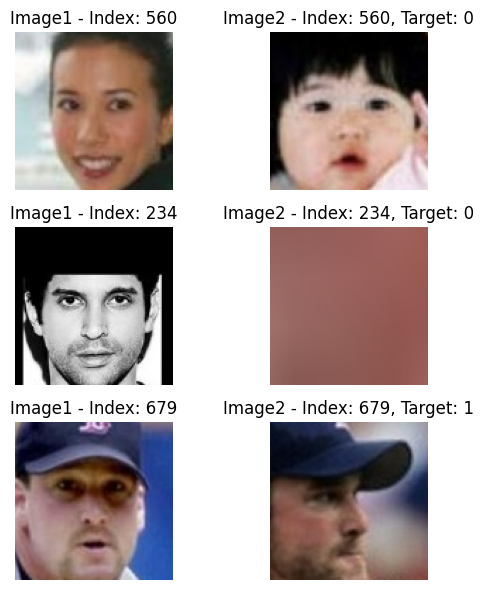

In [ ]:
sharp_outliers = dataCleaner_38K.plot_sharpness_outliers(df)

2030 sharpness -blurry in other term- outliers

sharpness distribution

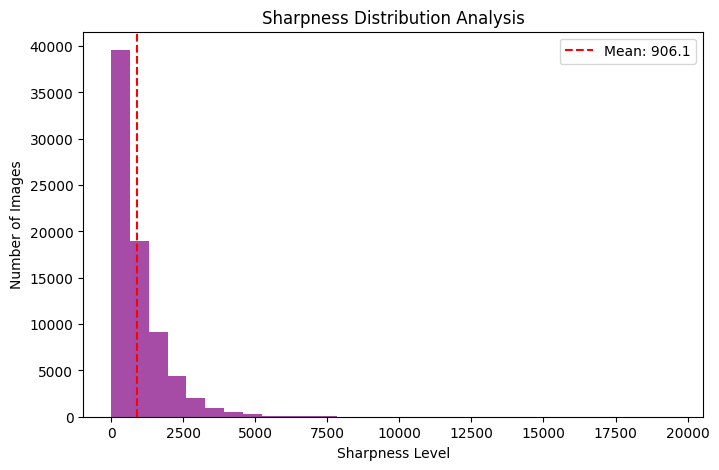

In [ ]:
sharpness_dist = dataCleaner_38K.analyze_sharpness_distribution(df)

#### resolution

In [ ]:
dataCleaner_38K.plot_low_resolution_outliers(df)

Found 0 low-resolution outliers.
No images to visualize.


no low resolution images

## Adjust DF

### adjust brightness

In [ ]:
df = dataCleaner_38K.apply_transformation_to_df(df, dataCleaner_38K.adjust_brightness)

Removed 295 instances (0.8%)


have a look over brightness outliers again

Found 4 brightness outliers.


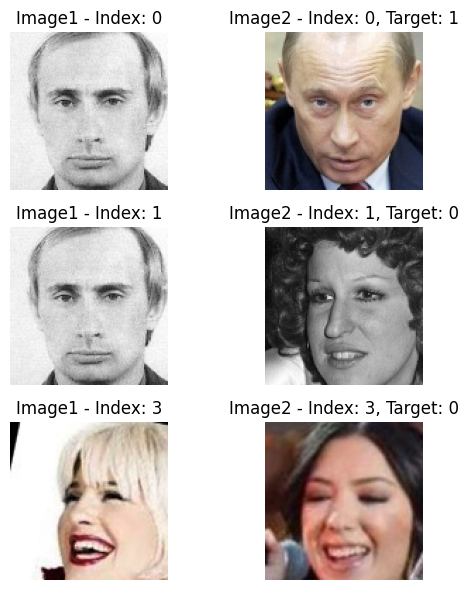

In [ ]:
dataCleaner_38K.plot_brightness_outliers(df)

even this 4 will be reduced because there's images that have other problems like image2 at index 2. it's so blurry and my functions will handle this

### adjust contrast

In [ ]:
df = dataCleaner_38K.apply_transformation_to_df(df, dataCleaner_38K.adjust_contrast)

Removed 131 instances (0.3%)


have a look over contrast outliers again

In [ ]:
dataCleaner_38K.plot_contrast_outliers(df)

Found 0 contrast outliers.
No images to visualize.


### adjust sharpness

In [ ]:
df = dataCleaner_38K.apply_transformation_to_df(df, dataCleaner_38K.adjust_sharpness)

Removed 675 instances (1.8%)


have a look over sharpness outliers again

Found 12 sharpness outliers.


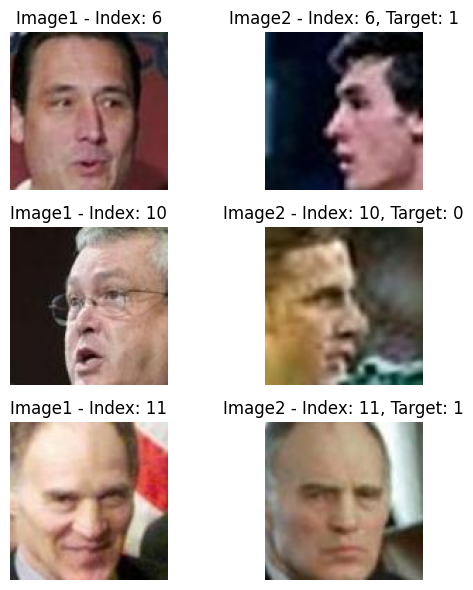

In [ ]:
sharp_outliers = dataCleaner_38K.plot_sharpness_outliers(df)

have a look on the remained ones and remove them

In [ ]:
df = dataCleaner_38K.remove_outliers(df, sharp_outliers)

Removed 12 outliers. Remaining rows: 36887


### Allign faces -remove non face images-

In [ ]:
df = dataCleaner_38K.apply_transformation_to_df(df, dataCleaner_38K.align_face)

the above fun. requires some time to run either it needs to be run locally or needs more optimization like batch processing for example.

## download cleaned df

In [ ]:
dataCleaner_38K.save_df_to_pc(df)

## SUMMARY

the data has the schema : image1, image2, target
it's in bytes form
i checked for corrupted images, image modes. i handled image outliers. removed severe ones -aroud 3%- and adjusted the rest -around 4-8%-.

the data overall will be a good pick for the siamese nn to learn.

